In [1]:
%matplotlib notebook

In [2]:
from forced_barotropic_sphere.sphere import Sphere
from forced_barotropic_sphere.solver import Solver
from forced_barotropic_sphere.forcing import Forcing
#import bm_methods.bm_methods
import forced_barotropic_sphere.plotting as plotters
import forced_barotropic_sphere.ensemble_methods as ensemble_methods
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl          # Plotting routines
import matplotlib.pyplot as plt    
import matplotlib.animation as manim
import matplotlib.ticker as mticker
from IPython.display import display, clear_output, HTML, FileLink  # Some technical stuff, used to display animation
#from ipywidgets import FloatProgress
from ipykernel.pylab.backend_inline import flush_figures
import cartopy                   # Map projection stuff
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Test a single model run

In [ ]:
dt = 2000 #time between integration steps (seconds)
Nt = 600 #number of integration steps
T= Nt*dt #total integration time
print('integrating for ', T/86400, ' days, with a dt of ', dt/86400, ' days')

ofreq = 5

#T42 resolution
nlat=64; nlon=128
st = Sphere(nlat,nlon)
#st.held_1985()
F = Forcing(st,dt,T)
forcing_tseries = F.generate_rededdy_tseries(A=1e-11)

k0=6
vortp = 10e-5 * np.exp( -0.5 * (st.glats - 20.)**2 / 10**2 ) * np.cos(k0 * st.rlons)
thetap = np.zeros(vortp.shape)
vortp = np.zeros(thetap.shape)
ics = np.array([vortp,thetap])

sln = Solver(st, forcing=F, ofreq=ofreq).integrate_dynamics(linear=True)
tidx=int(Nt/ofreq)-1
f,ax = plotters.plot_overview(sln.isel(time=tidx), levels=[np.linspace(-1,1,6),np.arange(258,300,7)], perturbation=[True,False])
#f.savefig('./images/L18_singlerun.png',dpi=300, bbox_inches='tight')

integrating for  13.88888888888889  days, with a dt of  0.023148148148148147  days


100%|████████████████████████████████████████| 600/600 [00:01<00:00, 400.39it/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


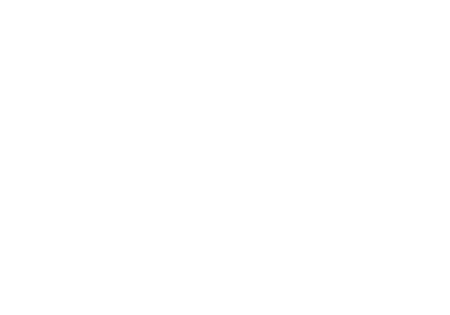

MovieWriter ffmpeg unavailable; using Pillow instead.

KeyboardInterrupt



In [21]:
#uncomment for animation of sln, this can take a while depending on integral time
plotters.overview_animation(sln, levels=[np.linspace(-1,1,6),np.arange(258,300,7)], perturbation=[True,False], filename = './images/evo.gif')

# Testing some ensemble methods

In [13]:
num_members= 5 #num of members in the ensemble
ofreq=5

thetap = np.zeros((nlat,nlon))
vortp = np.zeros((nlat,nlon))

#k0=6
#vortp = 10e-5 * np.exp( -0.5 * (st.glats - 20.)**2 / 10**2 ) * np.cos(k0 * st.rlons)

ics = np.array([vortp,thetap])
ensemble = ensemble_methods.integrate_ensemble(nlat,nlon,dt=dt, T=T, ofreq=ofreq, ics=ics,
                                               forcing_type='red_eddy', n_ens=num_members, linear=False, vortpert=1e-12, forcingpert=1e-12)

tidx=int(Nt/ofreq)-1

100%|███████████████████████████████████████| 1080/1080 [00:17<00:00, 61.16it/s]


<IPython.core.display.Javascript object>


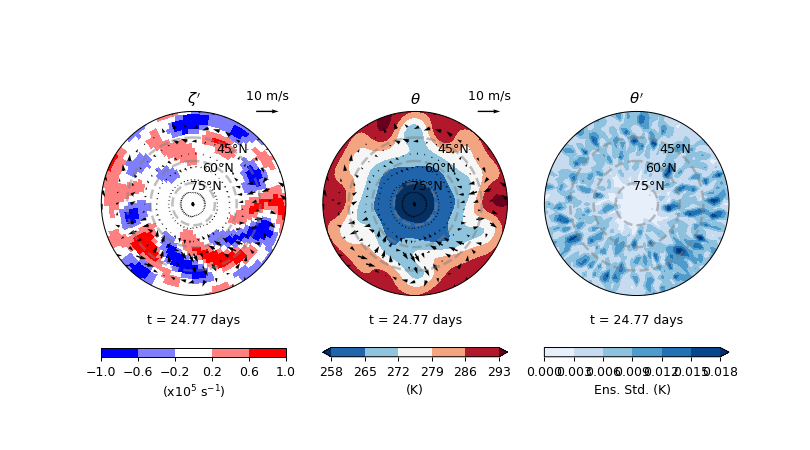

In [15]:
f,axs=plotters.plot_ensemble_overview(ensemble.isel(time=tidx//2), perturbation=[True,False],
                                      levels=[np.linspace(-1,1,6),np.arange(258,300,7),None])

<IPython.core.display.Javascript object>


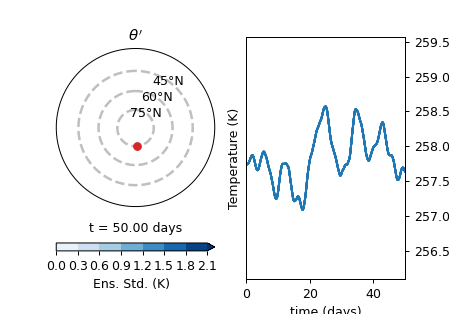

MovieWriter ffmpeg unavailable; using Pillow instead.


In [7]:
plotters.ensspread_point_animation(ensemble, xy=(5,75),levels = np.arange(0,2.4,0.3))